#  Reference to the Dataset: 
https://www.kaggle.com/code/nyagami/a-deep-dive-into-the-video-games-dataset/input

# An explanation on why this dataset is appropriate for linear regression

 By fitting a linear equation to observed data, linear regression makes an attempt to model the relationship between two variables (W3schools, 2024).

 The "Deep Dive into the Video Games Dataset" could be appropriate for linear regression for several reasons:

 1. Continuous Variables: When the variables in the dataset are continuous as opposed to categorical, linear regression performs well. Variables related to video games, such as storyline, genre, ratings, and votes, are frequently continuous and appropriate for linear regression analysis.

 2. Homoscedasticity: This is another assumption made by linear regression, which states that the variance of the residuals—that is, the variations between the actual and projected values—should be constant at all levels of the independent variables (GeeksforGeeks, 2024). When it comes to video game datasets, this assumption is frequently satisfied, particularly when the data has undergone the proper preprocessing.

 3. Large Sample Size: This dataset is sufficiently larger than most datasets and linear regression performs better with these larger sample sizes. With this video game dataset, with it being a large dataset and processed appropriately, will provide more reliable estimates in the linear regression model.

 4. Predictive Purposes: Predicting future sales or player involvement based on historical data is one common usage for linear regression. This video game dataset can be utilized to create a linear regression model for predictive analytics since it includes pertinent historical data.

 As this dataset "Deep Dive into the Video Games Dataset" satisfies these criteria, it would be considered appropriate for linear regression analysis.

# An explanation of what analysis is going to be performed on the dataset. 

1. Verification of Results: By using cross-validation techniques like K-fold cross-validation, which divide the dataset into numerous subsets and train and test the model on various combinations of these subsets to assure robustness and generalizability of the results (W3Schools, 2024), we will be able to validate the outcomes of our research.

2. Features to Extract:  
- Launch Year: A numeric variable that indicates the year in which the game was released.  
- Game Genre: A categorical variable that indicates the game's genre.
- Number of Voters: A numerical variable that indicates how many people have given the game a rating.  
- Director(s): A categorical variable containing the director(s)' name(s).  

3. Overfitting: We will use a linear regression model to fit our data, taking the following into consideration:  
- Overfitting: To make sure the model does not overfit and that it generalizes well to new data, we will keep an eye on its performance on a different validation set.  
- Underfitting: By analyzing the residuals and contrasting the expected and actual ratings, we will determine if the model accurately reflects the underlying patterns in the data.  

4. Libraries: The following libraries will be used and imported:  
- Pandas: For analysis and data manipulation.  
- Scikit-learn: For cross-validation and the application of the linear regression model.  
For data visualization, such as scatter plots, histograms, and regression graphs, I'll use Matplotlib and Seaborn.  

5. Predictions: Using the trained linear regression model, we will predict video game ratings based on the chosen features.  

6. Visualization of Data:  
- Scatter Plots: To show how the dependent variable (rating) and the independent factors (launch year, genre, number of voters, directors) relate to one another.  
- Histograms: To show how numerical variable distributions, like launch year and voter count, are distributed.  
- Regression Plots: Used to show the fitted linear regression line and evaluate the data's fit.  

By carrying out this analytical plan, we hope to gain understanding of the variables affecting video game ratings and develop a prediction model for determining game ratings based on pertinent characteristics.  

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the dataset
df = pd.read_csv('game_rating.csv')

print("This code imports necessary libraries for data analysis, reads a dataset named 'game_rating.csv' into a pandas DataFrame called 'df'.")

This code imports necessary libraries for data analysis, reads a dataset named 'game_rating.csv' into a pandas DataFrame called 'df'.


In [2]:
# Convert 'votes' column to numeric
df['votes'] = df['votes'].str.replace(',', '').astype(int)

# Verify data types of other columns
print(df.dtypes)

# Convert 'year' column to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['year'], inplace=True)

print("This code snippet cleans and converts the 'votes' column to numeric, verifies data types of other columns, converts the 'year' column to numeric, and drops rows with missing 'year' values.")

Unnamed: 0      int64
title          object
year           object
genre          object
rating        float64
votes           int32
directors      object
plot           object
dtype: object
This code snippet cleans and converts the 'votes' column to numeric, verifies data types of other columns, converts the 'year' column to numeric, and drops rows with missing 'year' values.


In [3]:
# Check for missing values
print(df.isnull().sum())

print("This code prints the sum of missing values in each column of the DataFrame 'df'.")

Unnamed: 0    0
title         0
year          0
genre         0
rating        0
votes         0
directors     0
plot          0
dtype: int64
This code prints the sum of missing values in each column of the DataFrame 'df'.


In [4]:
# Display the first few rows of the dataset
print(df.head())

print("This code prints the first few rows of the dataset stored in the variable 'df'.")

   Unnamed: 0                                      title    year  \
0           0                     The Last of Us: Part I  2022.0   
1           1                     Red Dead Redemption II  2018.0   
2           2  The Witcher 3: Wild Hunt - Blood and Wine  2016.0   
3           3                   The Witcher 3: Wild Hunt  2015.0   
4           4                             The Last of Us  2013.0   

                      genre  rating  votes                       directors  \
0  Action, Adventure, Drama     9.8    601  Matthew Gallant, Bruce Straley   
1  Action, Adventure, Crime     9.7  36441                         Missing   
2  Action, Adventure, Drama     9.7   7610            Konrad Tomaszkiewicz   
3  Action, Adventure, Drama     9.7  26328            Konrad Tomaszkiewicz   
4  Action, Adventure, Drama     9.7  61103   Neil Druckmann, Bruce Straley   

                                                plot  
0  Experience the emotional storytelling and unfo...  
1  Amidst th

c:\tools\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


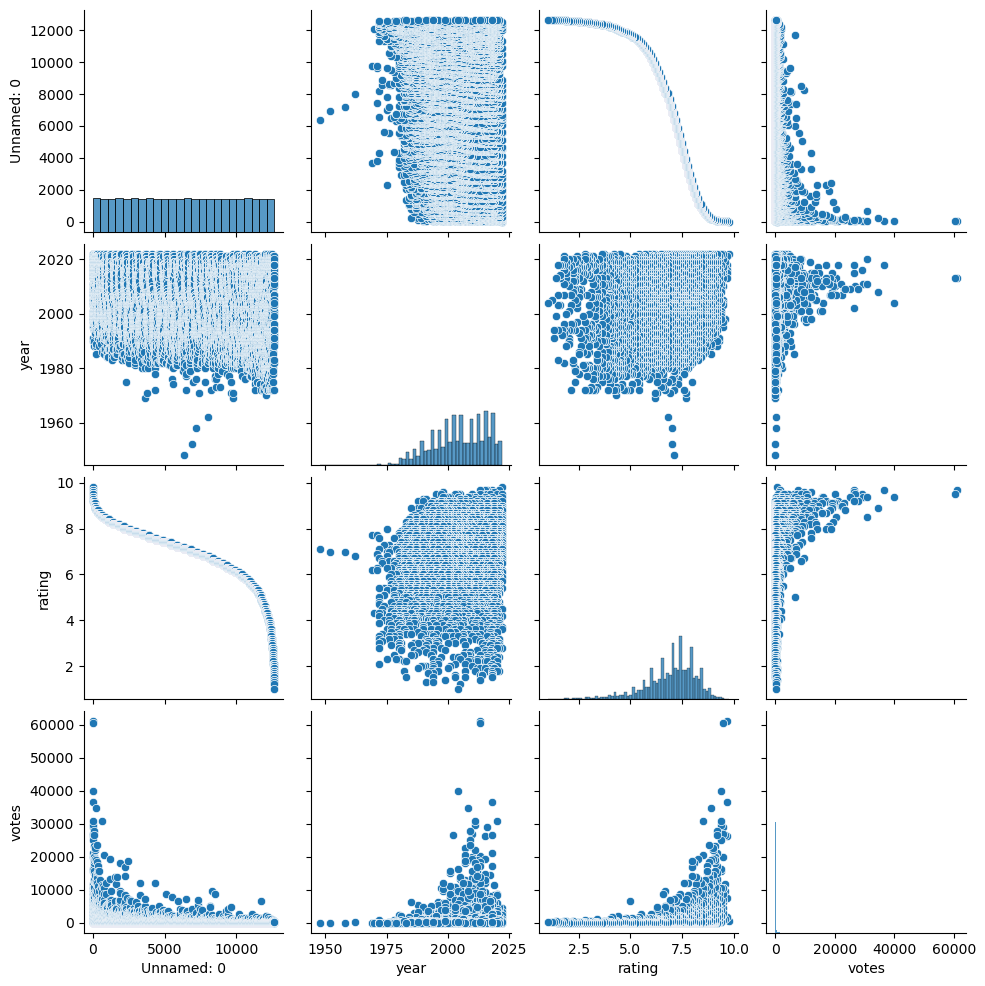

This code uses seaborn's pairplot function to create a grid of scatterplots for each pair of variables in the DataFrame 'df', along with histograms along the diagonal, and then displays the visualization.This code uses seaborn's pairplot function to create a grid of scatterplots for each pair of variables in the DataFrame 'df', along with histograms along the diagonal, and then displays the visualization.


In [5]:
# ***************************************************************************************
#    Title: Python – seaborn.pairplot() method
#    Author: W3Schools
#    Date Published: 2024
#    Date Retrieved: 3 April 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/python-seaborn-pairplot-method/
#
# ***************************************************************************************

# Explore data using pairplot and histograms
sns.pairplot(df)
plt.show()

print("This code uses seaborn's pairplot function to create a grid of scatterplots for each pair of variables in the DataFrame 'df', along with histograms along the diagonal, and then displays the visualization.This code uses seaborn's pairplot function to create a grid of scatterplots for each pair of variables in the DataFrame 'df', along with histograms along the diagonal, and then displays the visualization.")

In [6]:
# ***************************************************************************************
#    Title: Machine Learning - Train/Test
#    Author: W3Schools
#    Date Published: 2024
#    Date Retrieved: 3 April 2024
#    Code version: 1
#    Availability: https://www.w3schools.com/python/python_ml_train_test.asp
#
# ***************************************************************************************

# Define X and y, including director(s) as features
X = df[['year', 'genre', 'votes', 'directors']]
y = df['rating']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("This code prepares movie data by selecting features including year, genre, votes, and directors, converts categorical variables into dummy variables, and splits the data into training and testing sets for a machine learning model.")

This code prepares movie data by selecting features including year, genre, votes, and directors, converts categorical variables into dummy variables, and splits the data into training and testing sets for a machine learning model.


In [7]:
# ***************************************************************************************
#    Title: Machine Learning - Multiple Regression
#    Author: W3Schools
#    Date Published: 2024
#    Date Retrieved: 3 April 2024
#    Code version: 1
#    Availability: https://www.w3schools.com/python/python_ml_multiple_regression.asp
#
# ***************************************************************************************

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print("This code initializes a linear regression model, trains it using training data (X_train and y_train), and then uses the trained model to make predictions on test data (X_test), storing the predictions in the variable predictions.")

This code initializes a linear regression model, trains it using training data (X_train and y_train), and then uses the trained model to make predictions on test data (X_test), storing the predictions in the variable predictions.


In [8]:
# ***************************************************************************************
#    Title: Machine Learning - Multiple Regression
#    Author: W3Schools
#    Date Published: 2024
#    Date Retrieved: 5 April 2024
#    Code version: 1
#    Availability: https://www.w3schools.com/python/python_ml_multiple_regression.asp
#
# ***************************************************************************************

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

print("This code calculates and prints the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error to evaluate a model's performance.")

Mean Absolute Error: 2149817.293394996
Mean Squared Error: 1459943222175247.2
Root Mean Squared Error: 38209203.37006841
This code calculates and prints the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error to evaluate a model's performance.


In [9]:
# ***************************************************************************************
#    Title: Cross Validation in Machine Learning 
#    Author: GeeksforGeeks
#    Date Published: 21 December 2023
#    Date Retrieved: 5 April 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/cross-validation-machine-learning/
#
# ***************************************************************************************

# Implement K-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mae = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
cv_rmse = np.sqrt(-cv_mae)
print("Cross-Validation MAE:", cv_rmse.mean())

print("This code implements K-fold cross-validation to evaluate the model's performance using mean absolute error, and prints the mean of the root mean squared error (RMSE) across all folds.")

Cross-Validation MAE: 637.4057754535569
This code implements K-fold cross-validation to evaluate the model's performance using mean absolute error, and prints the mean of the root mean squared error (RMSE) across all folds.


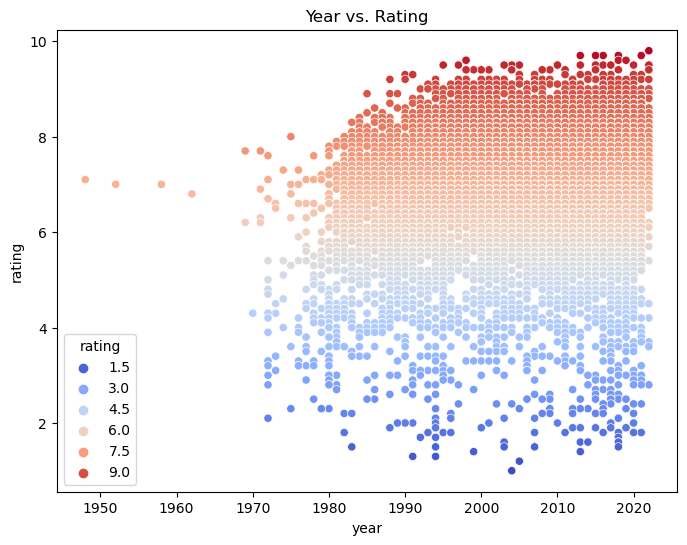

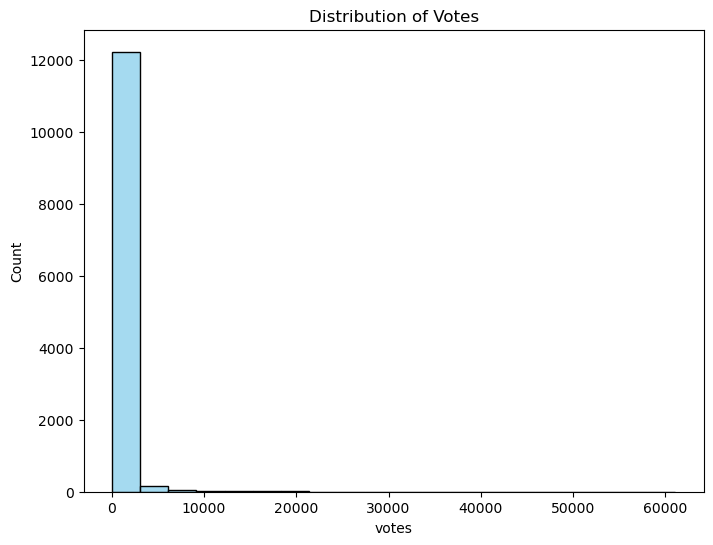

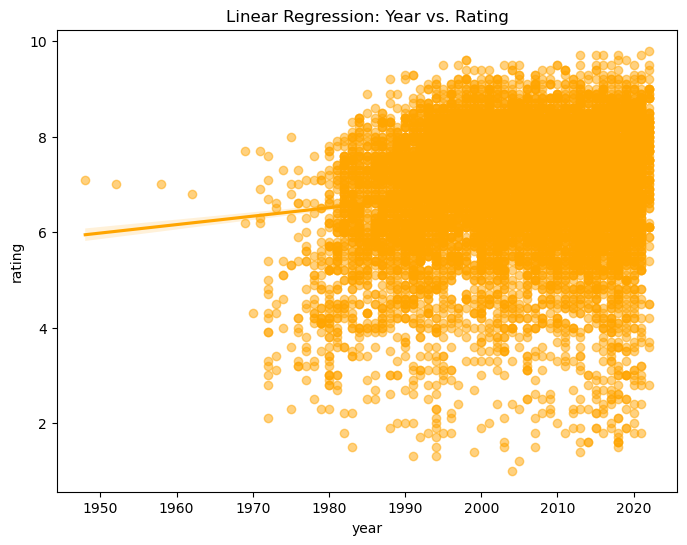

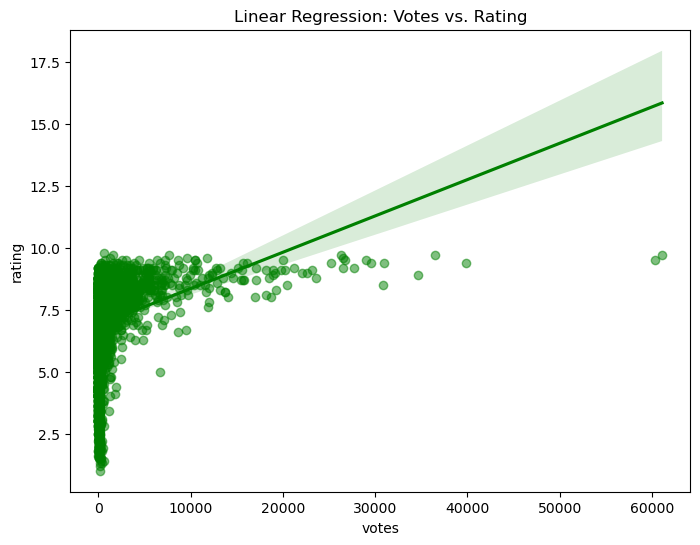

This codes uses seaborn to visualize relationships between movie data variables: year vs. rating, distribution of votes, and linear regression of year/votes vs. rating.


In [10]:
# ***************************************************************************************
#    Title: Machine Learning - Scatter Plot
#    Author: W3Schools
#    Date Published: 2023
#    Date Retrieved: 8 April 2024
#    Code version: 1
#    Availability: https://www.w3schools.com/python/python_ml_scatterplot.asp
#
# ***************************************************************************************

# ***************************************************************************************
#    Title: Plotting Histogram in Python using Matplotlib
#    Author: GeeksforGeeks
#    Date Published: 09 January 2024
#    Date Retrieved: 8 April 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
#
# ***************************************************************************************

# ***************************************************************************************
#    Title: Seaborn | Regression Plots
#    Author: GeeksforGeeks
#    Date Published: 09 December 2021
#    Date Retrieved: 8 April 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/seaborn-regression-plots/
#
# ***************************************************************************************

# Scatter plot for year vs. rating with color
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='rating', data=df, hue='rating', palette='coolwarm')
plt.title('Year vs. Rating')
plt.show()

# Histogram for number of voters with color
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='votes', bins=20, color='skyblue')
plt.title('Distribution of Votes')
plt.show()

# Regression plot for year and number of voters vs. rating with color
plt.figure(figsize=(8, 6))
sns.regplot(x='year', y='rating', data=df, scatter_kws={'alpha':0.5}, color='orange')
plt.title('Linear Regression: Year vs. Rating')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='votes', y='rating', data=df, scatter_kws={'alpha':0.5}, color='green')
plt.title('Linear Regression: Votes vs. Rating')
plt.show()

print("This codes uses seaborn to visualize relationships between movie data variables: year vs. rating, distribution of votes, and linear regression of year/votes vs. rating.")

# References for Theory

- W3schools. (2024). Machine Learning - Linear Regression. Retrieved March 5, 2024, from W3schools: https://www.w3schools.com/python/python_ml_linear_regression.asp

- GeeksforGeeks. (2024, January 2). Homoscedasticity in Regression. Retrieved March 5, 2024, from GeeksforGeeks: https://www.geeksforgeeks.org/homoscedasticity-in-regression/

- W3Schools. (2024). Machine Learning - Cross Validation. Retrieved March 7, 2024, from W3Schools: https://www.w3schools.com/python/python_ml_cross_validation.asp